# Music Genre Classification
## Neural Networks
---

In [18]:
#Imports
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers

from sklearn.neural_network import MLPClassifier


In [2]:
df = pd.read_csv("../data/genre_numerical_data.csv")

In [3]:
df.head()

,file_name,genre,global_tempo,zero_crossings,avg_zc_rate,std_zc_rate,avg_rms,std_rms,avg_amplitude_envelope,std_amplitude_envelope,...,avg_delta1_mfcc_24,std_delta1_mfcc_24,avg_delta2_mfcc_24,std_delta2_mfcc_24,avg_mfcc_25,std_mfcc_25,avg_delta1_mfcc_25,std_delta1_mfcc_25,avg_delta2_mfcc_25,std_delta2_mfcc_25
0,blues.00000.au,blues,123.0,55031.0,0.083074,0.027707,0.130360,0.053108,0.327602,0.140254,...,0.002245,2.584780,0.000505,1.465260,1.058656,37.768456,0.002283,2.544774,0.000335,1.443447
1,blues.00001.au,blues,108.0,37139.0,0.056064,0.038064,0.095905,0.048758,0.249066,0.140119,...,0.000356,3.524664,-0.004134,1.878435,-0.416541,53.829720,0.000848,3.463843,-0.004067,1.846598
2,blues.00002.au,blues,161.0,50563.0,0.076285,0.031682,0.175599,0.052479,0.444890,0.151819,...,-0.000813,3.028513,-0.000726,1.852521,0.139876,38.718422,-0.000571,2.981193,-0.000570,1.822811
3,blues.00003.au,blues,172.0,22077.0,0.033284,0.020516,0.141266,0.079632,0.306623,0.171395,...,-0.009183,3.269627,-0.000356,1.684101,-0.426795,53.465385,-0.008726,3.207656,-0.000323,1.652975
4,blues.00004.au,blues,136.0,67225.0,0.101487,0.044194,0.091617,0.048034,0.282141,0.167069,...,0.006547,3.204171,-0.001320,1.799860,-6.859077,46.151836,0.006658,3.149045,-0.001131,1.769600


In [40]:
#divide data into training and testing sets
y = df['genre']
l = LabelEncoder()
y = l.fit_transform(y)
y = pd.Series(y)
X = df.drop(columns = ['file_name', 'genre'])

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify = y)

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)
Z_train = pd.DataFrame(Z_train, columns = sc.get_feature_names_out())
Z_test = pd.DataFrame(Z_test, columns = sc.get_feature_names_out())

### Helper Function

In [52]:
#provide metrics and confusion matrix
def model_metrics(model):
    print(f'Training Accuracy is: {np.round(model.score(Z_train,y_train),2)}')
    print(f'Testing Accuracy is: {np.round(model.score(Z_test,y_test),2)}')
    print()
    cm = ConfusionMatrixDisplay.from_estimator(model, Z_test, y_test,display_labels = ["blues","classical","country",
                                                                                      "disco","hiphop","jazz",
                                                                                      "metal","pop","reggae",
                                                                                      "rock"])
    plt.xticks(rotation = 90)


## Neural Network - MLP

In [55]:
pipe_mlp = Pipeline([
    ('kbest', SelectKBest()),
    ('mlp', MLPClassifier(random_state=42))
])

mlp_params = {
    'kbest__k' : [140,145,150,155,160,165],
    'mlp__max_iter' : [100,200,300,400,500],
    'mlp__alpha' : [0, 0.0001, 0.0005, 0.001, 0.005],
    'mlp__hidden_layer_sizes' : [(100), (100,100), (100,100,100)],
    'mlp__activation' : ['logistic', 'relu']
}

gs_mlp = GridSearchCV(pipe_mlp, mlp_params, n_jobs= -1)

gs_mlp.fit(Z_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('kbest', SelectKBest()),
                                       ('mlp',
                                        MLPClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'kbest__k': [140, 145, 150, 155, 160, 165],
                         'mlp__activation': ['logistic', 'relu'],
                         'mlp__alpha': [0, 0.0001, 0.0005, 0.001, 0.005],
                         'mlp__hidden_layer_sizes': [100, (100, 100),
                                                     (100, 100, 100)],
                         'mlp__max_iter': [100, 200, 300, 400, 500]})

In [56]:
gs_mlp.best_params_

{'kbest__k': 155,
 'mlp__activation': 'logistic',
 'mlp__alpha': 0,
 'mlp__hidden_layer_sizes': (100, 100),
 'mlp__max_iter': 500}

Training Accuracy is: 1.0
Testing Accuracy is: 0.77



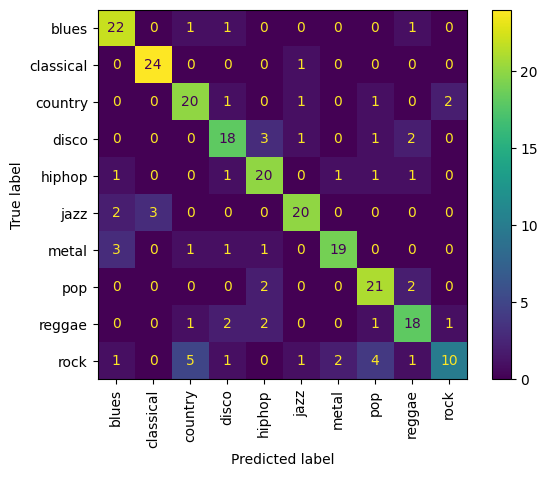

In [57]:
model_metrics(gs_mlp)

Model shows similar performance to non-neural network models. Classical music is most accurately classified and Rock is the worst. As usual, Country and Pop are the problem areas for Rock classification. This model's results also highlight the difficulty in differentiating between Jazz and Classical music. Like all of the previous models, this one is overfit as well.

## Neural Network - Keras

In [4]:
#divide into training and testing sets
y = df['genre']
l = LabelEncoder()
y = l.fit_transform(y)
y = to_categorical(y)
X = df.drop(columns = ['file_name', 'genre'])

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify = y)

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [5]:
#set model layers
model = Sequential()

model.add(Dense(128,
                activation = 'relu',
                input_shape = (184,), kernel_regularizer=l2(0.02)))
model.add(Dense(128, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dense(128, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dense(128, activation = 'relu', kernel_regularizer=l2(0.01)))

model.add(Dense(10, activation = 'softmax')) 

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [6]:
#fit model
res = model.fit(Z_train, y_train,
                epochs = 100,
                batch_size = 32,
                validation_data = (Z_test, y_test))

Epoch 1/100
24/24 [==============================] - 6s 14ms/step - loss: 8.0746 - accuracy: 0.2987 - val_loss: 6.9304 - val_accuracy: 0.3880
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 6.3074 - accuracy: 0.4360 - val_loss: 5.5475 - val_accuracy: 0.4640
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 5.0851 - accuracy: 0.5080 - val_loss: 4.5934 - val_accuracy: 0.5000
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 4.2704 - accuracy: 0.5173 - val_loss: 3.9312 - val_accuracy: 0.5280
Epoch 5/100
24/24 [==============================] - 0s 5ms/step - loss: 3.6430 - accuracy: 0.5747 - val_loss: 3.3953 - val_accuracy: 0.5400
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 3.1459 - accuracy: 0.6253 - val_loss: 3.0595 - val_accuracy: 0.6040
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 2.8619 - accuracy: 0.6320 - val_loss: 2.7376 - val_accuracy: 0.6560
Epoch 8/100


In [7]:
#print training and testing accuracy
round(res.history['accuracy'][-1],2), round(res.history['val_accuracy'][-1],2)

(0.93, 0.7)

Model is quite overfit. It performs at the same accuracy level as the people in the GTZAN study. 

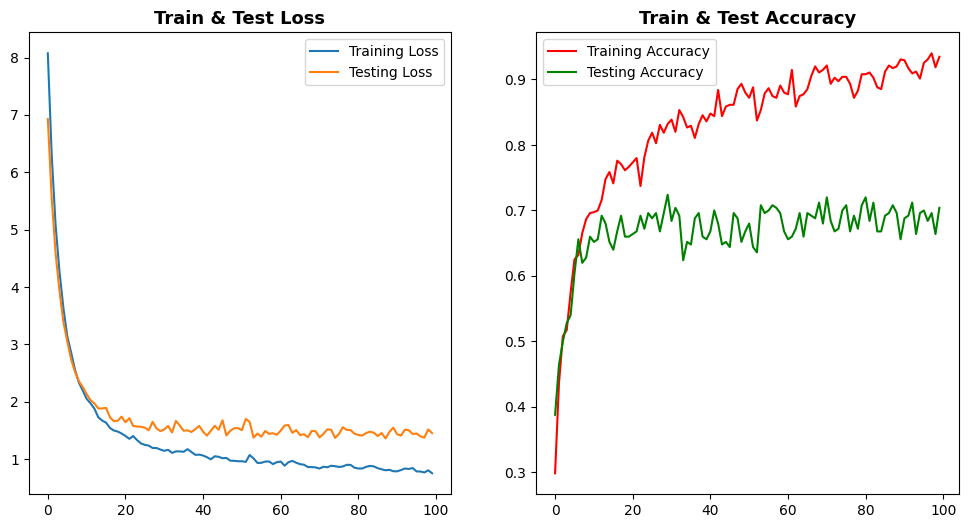

In [8]:
#display loss and accuracy 
fig, ax = plt.subplots(1, 2,figsize = (12,6))

train_loss = res.history['loss']
test_loss = res.history['val_loss']

train_acc = res.history['accuracy']
test_acc = res.history['val_accuracy']

ax[0].plot(train_loss, label='Training Loss')
ax[0].plot(test_loss, label='Testing Loss')
ax[0].set_title('Train & Test Loss', fontweight='bold', fontsize=13)

ax[1].plot(train_acc, label='Training Accuracy',color = "red")
ax[1].plot(test_acc, label='Testing Accuracy', color = 'green')
ax[1].set_title('Train & Test Accuracy', fontweight='bold', fontsize=13)

ax[0].legend()
ax[1].legend();

8/8 [==============================] - 0s 4ms/step


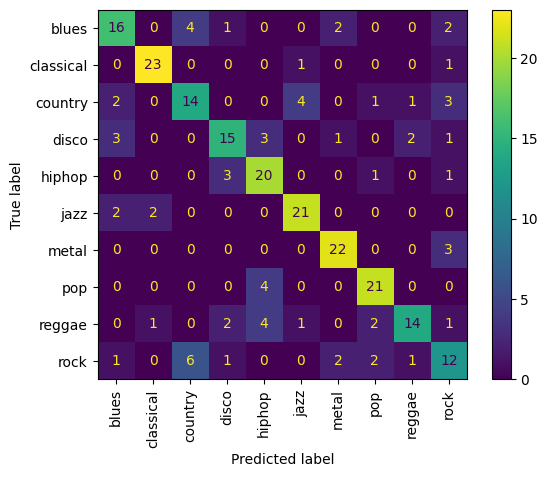

In [80]:
#display confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(Z_test), axis = 1))
c = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ["blues","classical","country",
                                                                                      "disco","hiphop","jazz",
                                                                                      "metal","pop","reggae",
                                                                                      "rock"])
c.plot()
plt.xticks(rotation = 90);

This model has a number of issues not previously seen. Many Country songs are misclassified as Jazz and many Reggae songs are classfied as Hip-Hop. This is easily the worst performing model on the numerical data.

## Neural Network - CNN

In [14]:
#use mfccs images for model
train_ds, validation_ds = image_dataset_from_directory(
        '../images/mfccs', 
        image_size=(256,256),
        batch_size=32,
        seed=42,
        validation_split=0.2,
        subset='both',
        label_mode='categorical'
)


Found 1005 files belonging to 10 classes.
Using 804 files for training.
Using 201 files for validation.


In [27]:
#set model layers
model = Sequential()

model.add(layers.Input(shape=(256,256,3)))
model.add(layers.Rescaling(1./255))


model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))

# Output
model.add(Dense(10,activation='softmax'))

In [28]:
#compile model
model.compile(
        optimizer='adam',
        loss ='categorical_crossentropy',
        metrics=['accuracy'])

In [29]:
#examine parameters
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 128)    0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 128)     147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 128)      

In [30]:
#fit and train model
h = model.fit(train_ds,validation_data=validation_ds,epochs=20)

Epoch 1/20
26/26 [==============================] - 20s 417ms/step - loss: 2.3359 - accuracy: 0.1032 - val_loss: 2.3500 - val_accuracy: 0.0846
Epoch 2/20
26/26 [==============================] - 11s 350ms/step - loss: 2.2514 - accuracy: 0.1418 - val_loss: 2.2507 - val_accuracy: 0.1443
Epoch 3/20
26/26 [==============================] - 12s 346ms/step - loss: 2.1971 - accuracy: 0.1965 - val_loss: 2.2819 - val_accuracy: 0.1144
Epoch 4/20
26/26 [==============================] - 13s 355ms/step - loss: 2.1773 - accuracy: 0.1878 - val_loss: 2.2230 - val_accuracy: 0.1841
Epoch 5/20
26/26 [==============================] - 12s 310ms/step - loss: 2.1570 - accuracy: 0.2077 - val_loss: 2.2404 - val_accuracy: 0.1692
Epoch 6/20
26/26 [==============================] - 12s 398ms/step - loss: 2.1026 - accuracy: 0.2313 - val_loss: 2.1752 - val_accuracy: 0.1990
Epoch 7/20
26/26 [==============================] - 12s 349ms/step - loss: 2.0059 - accuracy: 0.2600 - val_loss: 2.1039 - val_accuracy: 0.2189

CNN Model performance was abyssmal. The dataset is very small which may be detrimental to the performance of the neural networks in general. Additionally, the image choice may not have been optimal. One strategy may be split the audio into smaller time chunks to create more training data for the neural networks. Another idea is to create a multi-input neural network that takes in a variety of image types. 